In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./arrests_procesado.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5299706 entries, 0 to 5299705
Data columns (total 21 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ID            int64  
 1   Date          object 
 2   PD_CD         float64
 3   PD_DESC       object 
 4   KY_CD         float64
 5   Description   object 
 6   Law           object 
 7   Category      object 
 8   Borough       object 
 9   Precint       int64  
 10  Jurisdiction  object 
 11  Age           object 
 12  Sex           object 
 13  Race          object 
 14  X_COORD_CD    float64
 15  Y_COORD_CD    float64
 16  Latitude      float64
 17  Longitude     float64
 18  Lon_Lat       object 
 19  Month         object 
 20  Day           object 
dtypes: float64(6), int64(2), object(13)
memory usage: 849.1+ MB


In [4]:
df.head()

,ID,Date,PD_CD,PD_DESC,KY_CD,Description,Law,Category,Borough,Precint,...,Age,Sex,Race,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,Month,Day
0,85594383,2012-07-05,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401000,Misdemeanor,Manhattan,25,...,45-64,M,BLACK,1003300.0,5230799.0,40.766905,-73.913327,POINT (-73.91332699999998 54.37290151600007),July,Thursday
1,84747924,2012-05-15,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401000,Misdemeanor,Bronx,40,...,25-44,M,WHITE HISPANIC,1007098.0,3234465.0,40.838172,-73.905813,POINT (-73.90581255299998 49.009891884000076),May,Tuesday
2,84164045,2012-04-11,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401000,Misdemeanor,Bronx,47,...,25-44,M,BLACK,1027676.0,2261851.0,40.838172,-73.828816,POINT (-73.828816465 46.36334352800003),April,Wednesday
3,82437256,2012-01-02,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601502,Felony,Bronx,52,...,18-24,M,BLACK,1013626.0,3253434.0,40.838172,-73.878793,POINT (-73.87879308899994 49.06130772800003),January,Monday
4,82300383,2011-12-22,782.0,"WEAPONS, POSSESSION, ETC",236.0,DANGEROUS WEAPONS,PL 2650101,Misdemeanor,Bronx,47,...,25-44,M,BLACK,1027676.0,2261851.0,40.838172,-73.828816,POINT (-73.828816465 46.36334352800003),December,Thursday


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

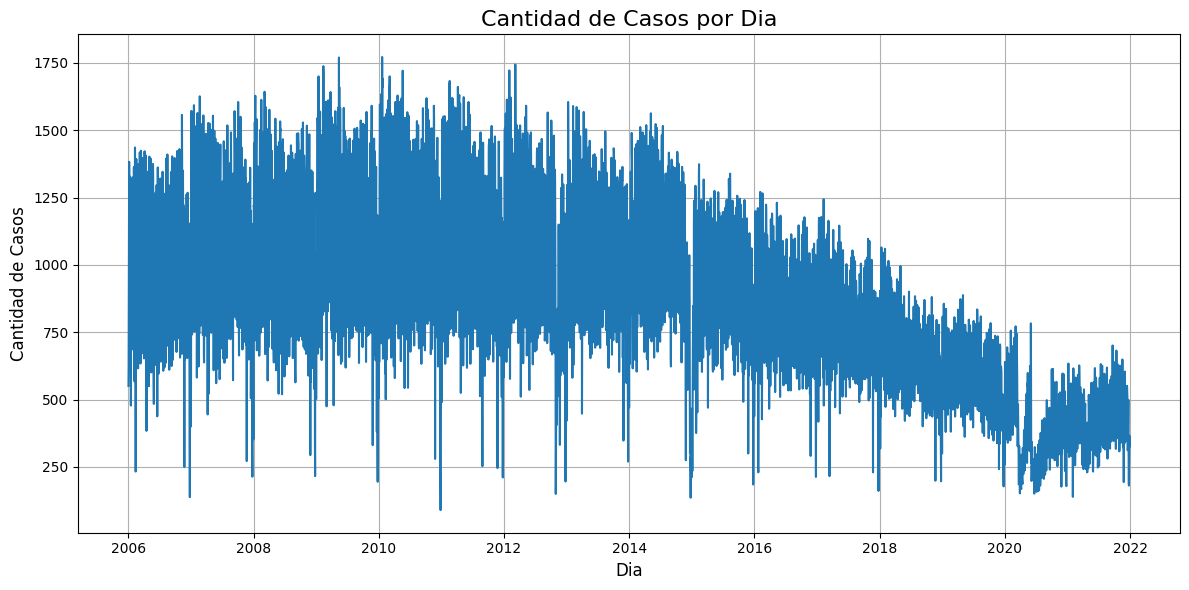

In [6]:
df_dia = df.groupby(df['Date'].dt.to_period('D')).size().reset_index(name='CASE_COUNT')

# Convierte la columna de periodos a datetime para ordenar correctamente
df_dia['Date'] = df_dia['Date'].dt.to_timestamp()

# Visualiza los datos en un gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_dia['Date'], df_dia['CASE_COUNT'], linestyle='-')
plt.title('Cantidad de Casos por Dia', fontsize=16)
plt.xlabel('Dia', fontsize=12)
plt.ylabel('Cantidad de Casos', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
full_dates = pd.date_range(start=df_dia['Date'].min(), end=df_dia['Date'].max())
arrests_diarios = df_dia.set_index('Date').reindex(full_dates).fillna(0).rename_axis('Date').reset_index()

In [8]:
arrests_diarios

,Date,CASE_COUNT
0,2006-01-01,551
1,2006-01-02,618
2,2006-01-03,899
3,2006-01-04,1229
4,2006-01-05,1383
...,...,...
5839,2021-12-27,297
5840,2021-12-28,358
5841,2021-12-29,366
5842,2021-12-30,325


In [9]:
from sklearn.cluster import KMeans

coords = df[['Latitude', 'Longitude']].dropna()
kmeans = KMeans(n_clusters=10)
df['LocationCluster'] = kmeans.fit_predict(coords)

c:\Users\peric\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
df.columns

Index(['ID', 'Date', 'PD_CD', 'PD_DESC', 'KY_CD', 'Description', 'Law',
       'Category', 'Borough', 'Precint', 'Jurisdiction', 'Age', 'Sex', 'Race',
       'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat', 'Month',
       'Day', 'LocationCluster'],
      dtype='object')

In [13]:
df.head()

,ID,Date,PD_CD,PD_DESC,KY_CD,Description,Law,Category,Borough,Precint,...,Sex,Race,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,Month,Day,LocationCluster
0,85594383,2012-07-05,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401000,Misdemeanor,Manhattan,25,...,M,BLACK,1003300.0,5230799.0,40.766905,-73.913327,POINT (-73.91332699999998 54.37290151600007),July,Thursday,1
1,84747924,2012-05-15,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401000,Misdemeanor,Bronx,40,...,M,WHITE HISPANIC,1007098.0,3234465.0,40.838172,-73.905813,POINT (-73.90581255299998 49.009891884000076),May,Tuesday,0
2,84164045,2012-04-11,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401000,Misdemeanor,Bronx,47,...,M,BLACK,1027676.0,2261851.0,40.838172,-73.828816,POINT (-73.828816465 46.36334352800003),April,Wednesday,0
3,82437256,2012-01-02,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601502,Felony,Bronx,52,...,M,BLACK,1013626.0,3253434.0,40.838172,-73.878793,POINT (-73.87879308899994 49.06130772800003),January,Monday,0
4,82300383,2011-12-22,782.0,"WEAPONS, POSSESSION, ETC",236.0,DANGEROUS WEAPONS,PL 2650101,Misdemeanor,Bronx,47,...,M,BLACK,1027676.0,2261851.0,40.838172,-73.828816,POINT (-73.828816465 46.36334352800003),December,Thursday,0


In [15]:
merged_df = pd.merge(arrests_diarios, df, how='left', on='Date')

In [17]:
merged_df.head()

,Date,CASE_COUNT,ID,PD_CD,PD_DESC,KY_CD,Description,Law,Category,Borough,...,Sex,Race,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,Month,Day,LocationCluster
0,2006-01-01,551,9929974,969.0,"TRAFFIC,UNCLASSIFIED INFRACTION",881.0,OTHER TRAFFIC INFRACTION,VTL0319001,Infraction,Brooklyn,...,M,BLACK,1017455.0,189330.0,40.686290,-73.880274,POINT (-73.88027376799994 40.686289816000055),January,Sunday,5
1,2006-01-01,551,9930137,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,Felony,Manhattan,...,M,WHITE HISPANIC,996981.0,238664.0,40.821752,-73.954004,POINT (-73.95400369699998 40.82175222200004),January,Sunday,7
2,2006-01-01,551,9930232,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,Violation,Queens,...,F,WHITE HISPANIC,1022438.0,212839.0,40.750796,-73.862173,POINT (-73.86217315899995 40.75079620400004),January,Sunday,1
3,2006-01-01,551,9929916,793.0,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650204,Felony,Brooklyn,...,M,BLACK,999649.0,189272.0,40.686180,-73.944477,POINT (-73.94447718599997 40.68617950700008),January,Sunday,8
4,2006-01-01,551,9930129,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 2650300,Felony,Manhattan,...,M,BLACK,994357.0,228299.0,40.793307,-73.963500,POINT (-73.96349994499997 40.79330655100006),January,Sunday,7


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5299706 entries, 0 to 5299705
Data columns (total 22 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ID               int64         
 1   Date             datetime64[ns]
 2   PD_CD            float64       
 3   PD_DESC          object        
 4   KY_CD            float64       
 5   Description      object        
 6   Law              object        
 7   Category         object        
 8   Borough          object        
 9   Precint          int64         
 10  Jurisdiction     object        
 11  Age              object        
 12  Sex              object        
 13  Race             object        
 14  X_COORD_CD       float64       
 15  Y_COORD_CD       float64       
 16  Latitude         float64       
 17  Longitude        float64       
 18  Lon_Lat          object        
 19  Month            object        
 20  Day              object        
 21  LocationCluster  int32         

In [19]:
arrests_diarios

,Date,CASE_COUNT
0,2006-01-01,551
1,2006-01-02,618
2,2006-01-03,899
3,2006-01-04,1229
4,2006-01-05,1383
...,...,...
5839,2021-12-27,297
5840,2021-12-28,358
5841,2021-12-29,366
5842,2021-12-30,325


In [22]:
df.columns

Index(['Date', 'CASE_COUNT', 'ID', 'PD_CD', 'PD_DESC', 'KY_CD', 'Description',
       'Law', 'Category', 'Borough', 'Precint', 'Jurisdiction', 'Age', 'Sex',
       'Race', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat',
       'Month', 'Day', 'LocationCluster'],
      dtype='object')

In [23]:
cols_interes = ['Date', 'CASE_COUNT', 'Description',
       'Law', 'Category', 'Borough', 'Precint', 'Jurisdiction', 'Age', 'Sex',
       'Race','Month', 'Day', 'LocationCluster']

In [24]:
df = df[cols_interes]

In [53]:
from feature_engine.encoding import OrdinalEncoder
from category_encoders import TargetEncoder
from feature_engine.encoding import CountFrequencyEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import TargetEncoder
from feature_engine.encoding import CountFrequencyEncoder
from sklearn.compose import ColumnTransformer
import pathlib
import joblib

# Función para realizar los encodings
def trans_factores(df, vars_cat, var_clase):
    ordinal_encoder = OrdinalEncoder()
    frecuency_transformer = CountFrequencyEncoder(encoding_method='frequency')

    preprocess = ColumnTransformer(
        transformers=[
            ('ordinal_encoder', ordinal_encoder, vars_cat),
            ('frecuency_transformer', frecuency_transformer, vars_cat),
        ],
        remainder='passthrough'
    )

    train_features = preprocess.fit_transform(df[vars_cat], df[var_clase])

    # Guardamos archivo con encodings de los transformadores
    pathlib.Path(f"preprocessing").mkdir(parents=True, exist_ok=True)
    _ = joblib.dump(preprocess, 'preprocessing/transformer.joblib')

    # Renombramos variables codificadas
    vars_cat_cols = [s + '_ordinal' for s in vars_cat]
    vars_cat_cols += [s + '_freq' for s in vars_cat]
    df2 = df.copy()
    df2.drop(columns=vars_cat, axis=1, inplace=True)
    df2 = pd.concat([df2, pd.DataFrame(train_features, columns=vars_cat_cols)], axis=1)
    return df2


In [55]:
df = trans_factores(df, vars_cat, var_clase)

In [59]:
df.columns

Index(['Date', 'CASE_COUNT', 'Precint', 'LocationCluster',
       'Description_ordinal', 'Law_ordinal', 'Category_ordinal',
       'Borough_ordinal', 'Jurisdiction_ordinal', 'Age_ordinal', 'Sex_ordinal',
       'Race_ordinal', 'Month_ordinal', 'Day_ordinal', 'Description_freq',
       'Law_freq', 'Category_freq', 'Borough_freq', 'Jurisdiction_freq',
       'Age_freq', 'Sex_freq', 'Race_freq', 'Month_freq', 'Day_freq'],
      dtype='object')

In [60]:
features_to_aggregate = [
    'Precint', 'LocationCluster', 'Description_ordinal', 'Law_ordinal', 
    'Category_ordinal', 'Borough_ordinal', 'Jurisdiction_ordinal', 'Age_ordinal', 
    'Sex_ordinal', 'Race_ordinal', 'Month_ordinal', 'Day_ordinal', 
    'Description_freq', 'Law_freq', 'Category_freq', 'Borough_freq', 
    'Jurisdiction_freq', 'Age_freq', 'Sex_freq', 'Race_freq', 
    'Month_freq', 'Day_freq'
]

# Generar estadísticas por día
agg_dict = {col: ['mean', 'std', 'min', 'max', 'sum'] for col in features_to_aggregate}

# Crear el nuevo dataframe con las agregaciones
df_agg = df.groupby('Date').agg(agg_dict)

# Renombrar columnas (aplanar el MultiIndex resultante)
df_agg.columns = ['_'.join(col).strip() for col in df_agg.columns]

# Resetear el índice para tener 'Date' como columna normal
df_agg.reset_index(inplace=True)

# Combinar con CASE_COUNT (que ya está agregado por día)
df_final = df_agg.merge(df[['Date', 'CASE_COUNT']].drop_duplicates(), on='Date', how='left')


In [61]:
df_final

,Date,Precint_mean,Precint_std,Precint_min,Precint_max,Precint_sum,LocationCluster_mean,LocationCluster_std,LocationCluster_min,LocationCluster_max,...,Month_freq_std,Month_freq_min,Month_freq_max,Month_freq_sum,Day_freq_mean,Day_freq_std,Day_freq_min,Day_freq_max,Day_freq_sum,CASE_COUNT
0,2006-01-01,62.680581,35.448805,1,123,34537,4.063521,2.889724,0,9,...,0.0,0.088371,0.088371,48.692596,0.096061,0.0,0.096061,0.096061,52.929397,551
1,2006-01-02,63.652104,31.437267,1,123,39337,4.527508,2.906437,0,9,...,0.0,0.088371,0.088371,54.613474,0.108118,0.0,0.108118,0.108118,66.817202,618
2,2006-01-03,62.379310,34.048761,5,123,56079,4.031146,2.925414,0,9,...,0.0,0.088371,0.088371,79.445814,0.157586,0.0,0.157586,0.157586,141.669904,899
3,2006-01-04,62.816111,34.228639,1,123,77201,3.986168,2.872531,0,9,...,0.0,0.088371,0.088371,108.608349,0.175175,0.0,0.175175,0.175175,215.289612,1229
4,2006-01-05,58.650759,33.493291,1,123,81114,4.129429,2.938323,0,9,...,0.0,0.088371,0.088371,122.217532,0.167404,0.0,0.167404,0.167404,231.520258,1383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,2021-12-27,64.329966,34.481863,1,123,19106,4.178451,2.808976,0,9,...,0.0,0.070085,0.070085,20.815307,0.108118,0.0,0.108118,0.108118,32.111180,297
5840,2021-12-28,64.008380,36.603752,1,123,22915,4.209497,2.818152,0,9,...,0.0,0.070085,0.070085,25.090505,0.157586,0.0,0.157586,0.157586,56.415824,358
5841,2021-12-29,58.139344,33.626958,1,123,21279,4.306011,2.707537,0,9,...,0.0,0.070085,0.070085,25.651186,0.175175,0.0,0.175175,0.175175,64.113912,366
5842,2021-12-30,63.270769,36.114024,1,122,20563,3.858462,2.724766,0,9,...,0.0,0.070085,0.070085,22.777693,0.167404,0.0,0.167404,0.167404,54.406424,325


In [82]:
df_final['Year'] = df_final['Date'].dt.year
df_final['Month'] = df_final['Date'].dt.month
df_final['Day'] = df_final['Date'].dt.day
df_final['DayOfWeek'] = df_final['Date'].dt.dayofweek

# Si es necesario, elimina la columna Date para evitar problemas
df_final.drop(columns=['Date'], inplace=True)

In [83]:
from sklearn.model_selection import train_test_split
y = df_final['CASE_COUNT']
X = df_final.drop(columns=['CASE_COUNT'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [84]:
import matplotlib.pyplot as plt
import shap
import tensorflow as tf

class CustomNeuralNetwork:
    def __init__(self, input_shape, output_units=1, problem_type='regression', hidden_layers=2,
                 units_per_layer=64, activation='relu', dropout_rate=0.0, l2_lambda=0.0, l1_lambda=0.0,
                 learning_rate=0.001):
        """
        Constructor de la red neuronal adaptable para problemas de regresión y clasificación.
        """
        self.model = tf.keras.Sequential()
        self.input_shape = input_shape
        self.output_units = output_units
        self.problem_type = problem_type
        self.hidden_layers = hidden_layers
        self.units_per_layer = units_per_layer
        self.activation = activation
        self.dropout_rate = dropout_rate
        self.l2_lambda = l2_lambda
        self.l1_lambda = l1_lambda
        self.learning_rate = learning_rate
        self._build_model()

    def _build_model(self):
        # Añadir capa de entrada
        self.model.add(tf.keras.layers.Dense(self.units_per_layer, activation=self.activation, input_shape=self.input_shape,
                                             kernel_regularizer=tf.keras.regularizers.l2(self.l2_lambda) if self.l2_lambda > 0 else 
                                                             tf.keras.regularizers.l1(self.l1_lambda) if self.l1_lambda > 0 else None))

        # Añadir capas ocultas
        for _ in range(self.hidden_layers - 1):
            self.model.add(tf.keras.layers.Dense(self.units_per_layer, activation=self.activation,
                                                 kernel_regularizer=tf.keras.regularizers.l2(self.l2_lambda) if self.l2_lambda > 0 else 
                                                                 tf.keras.regularizers.l1(self.l1_lambda) if self.l1_lambda > 0 else None))
            if self.dropout_rate > 0:
                self.model.add(tf.keras.layers.Dropout(self.dropout_rate))

        # Añadir capa de salida en función del tipo de problema
        if self.problem_type == 'regression':
            self.model.add(tf.keras.layers.Dense(self.output_units, activation='linear'))
        elif self.problem_type == 'classification':
            if self.output_units == 1:  # Clasificación binaria
                self.model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Activación sigmoide
            else:  # Clasificación multiclase
                self.model.add(tf.keras.layers.Dense(self.output_units, activation='softmax'))

    def compile_model(self, optimizer=None, loss=None, metrics=None):
        # Configurar el optimizador con la tasa de aprendizaje
        if optimizer is None:
            optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        
        # Configurar la función de pérdida según el tipo de problema
        if self.problem_type == 'regression':
            loss = loss or 'mse'
            metrics = metrics or ['mae']
        elif self.problem_type == 'classification':
            if self.output_units == 1:  # Problema binario
                loss = loss or 'binary_crossentropy'
                metrics = metrics or ['accuracy']
            else:  # Problema multiclase
                loss = loss or 'sparse_categorical_crossentropy'
                metrics = metrics or ['accuracy']

        self.model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    def train_model(self, x_train, y_train, validation_data=None, epochs=20, batch_size=32, plot_training=False):
        callbacks = []
        history = self.model.fit(x_train, y_train, validation_data=validation_data, epochs=epochs, batch_size=batch_size,
                                 callbacks=callbacks)
        if plot_training:
            self.plot_training(history)
        return history

    def evaluate_model(self, x_test, y_test):
        return self.model.evaluate(x_test, y_test)

    def predict(self, x):
        return self.model.predict(x)
    
    def reset_weights(self):
        for layer in self.model.layers:
            if hasattr(layer, 'kernel_initializer'):
                layer.kernel.assign(layer.kernel_initializer(tf.shape(layer.kernel)))
            if hasattr(layer, 'bias_initializer'):
                layer.bias.assign(layer.bias_initializer(tf.shape(layer.bias)))

    def plot_training(self, history):
        """
        Método para visualizar todas las métricas y la pérdida durante el entrenamiento.
        Se adapta dinámicamente a las métricas utilizadas.
        """
        # Obtener las métricas disponibles en el historial (excluyendo 'loss' y 'val_loss' inicialmente)
        metrics = [m for m in history.history.keys() if not m.startswith('val_') and m != 'loss']
        
        # Determinar el número total de subplots
        total_plots = len(metrics) + 1  # Incluyendo la pérdida
        
        # Determinar el tamaño adecuado de la cuadrícula (por ejemplo, 2 filas x n columnas)
        rows = (total_plots // 2) + (total_plots % 2)
        
        # Crear el gráfico con un tamaño adecuado
        plt.figure(figsize=(12, rows * 4))  # Ajustar el tamaño en función de la cantidad de filas
        
        # Iterar sobre las métricas y graficar tanto las de entrenamiento como las de validación
        for i, metric in enumerate(metrics):
            plt.subplot(rows, 2, i + 1)
            plt.plot(history.history[metric], label=f'Train {metric.capitalize()}')
            val_metric = f'val_{metric}'
            if val_metric in history.history:
                plt.plot(history.history[val_metric], label=f'Validation {metric.capitalize()}')
            plt.title(f'{metric.capitalize()} durante el Entrenamiento')
            plt.xlabel('Epoch')
            plt.ylabel(metric.capitalize())
            plt.legend()

        # Gráfico de la pérdida
        plt.subplot(rows, 2, len(metrics) + 1)
        plt.plot(history.history['loss'], label='Train Loss')
        if 'val_loss' in history.history:
            plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Pérdida durante el Entrenamiento')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    def calculate_shap_values(self, x_train, x_test, feature_names=None, plot_summary=True):
        """
        Calcula los SHAP values para el conjunto de datos de prueba y los visualiza.
        Utiliza DeepExplainer para redes neuronales.
        """
        # Crear el explainer
        explainer = shap.DeepExplainer(self.model, x_train)
        
        # Calcular los SHAP values (la salida se descarta usando "_")
        shap_values = explainer.shap_values(x_test)

        # Mostrar resumen de los SHAP values con feature names si están disponibles
        if plot_summary:
            shap.summary_plot(shap_values, x_test, feature_names=feature_names)

In [85]:
X_train

,Precint_mean,Precint_std,Precint_min,Precint_max,Precint_sum,LocationCluster_mean,LocationCluster_std,LocationCluster_min,LocationCluster_max,LocationCluster_sum,...,Month_freq_sum,Day_freq_mean,Day_freq_std,Day_freq_min,Day_freq_max,Day_freq_sum,Year,Month,Day,DayOfWeek
0,62.680581,35.448805,1,123,34537,4.063521,2.889724,0,9,2239,...,48.692596,0.096061,0.0,0.096061,0.096061,52.929397,2006,1,1,6
1,63.652104,31.437267,1,123,39337,4.527508,2.906437,0,9,2798,...,54.613474,0.108118,0.0,0.108118,0.108118,66.817202,2006,1,2,0
2,62.379310,34.048761,5,123,56079,4.031146,2.925414,0,9,3624,...,79.445814,0.157586,0.0,0.157586,0.157586,141.669904,2006,1,3,1
3,62.816111,34.228639,1,123,77201,3.986168,2.872531,0,9,4899,...,108.608349,0.175175,0.0,0.175175,0.175175,215.289612,2006,1,4,2
4,58.650759,33.493291,1,123,81114,4.129429,2.938323,0,9,5711,...,122.217532,0.167404,0.0,0.167404,0.167404,231.520258,2006,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4670,58.853047,35.908270,1,123,32840,3.951613,2.791914,0,9,2205,...,48.110902,0.108118,0.0,0.108118,0.108118,60.330095,2018,10,15,0
4671,62.242838,36.108420,1,123,45624,3.991814,2.809029,0,9,2926,...,63.199447,0.157586,0.0,0.157586,0.157586,115.510611,2018,10,16,1
4672,64.436118,35.421729,1,123,52451,4.031941,2.766690,0,9,3282,...,70.183287,0.175175,0.0,0.175175,0.175175,142.592143,2018,10,17,2
4673,60.085672,36.623162,1,123,40678,3.970458,2.807273,0,9,2688,...,58.371112,0.167404,0.0,0.167404,0.167404,113.332766,2018,10,18,3


Epoch 1/100
293/293 [==============================] - 9s 5ms/step - loss: 1117702.0000 - mae: 1013.5132 - val_loss: 244274.0469 - val_mae: 469.0439
Epoch 2/100
293/293 [==============================] - 1s 3ms/step - loss: 1111468.5000 - mae: 1010.4379 - val_loss: 241848.7188 - val_mae: 466.4521
Epoch 3/100
293/293 [==============================] - 1s 4ms/step - loss: 1106212.6250 - mae: 1007.8145 - val_loss: 239219.2969 - val_mae: 463.6256
Epoch 4/100
293/293 [==============================] - 1s 3ms/step - loss: 1100636.8750 - mae: 1005.0654 - val_loss: 236812.7031 - val_mae: 461.0224
Epoch 5/100
293/293 [==============================] - 1s 3ms/step - loss: 1095548.1250 - mae: 1002.5149 - val_loss: 234268.4062 - val_mae: 458.2548
Epoch 6/100
293/293 [==============================] - 1s 3ms/step - loss: 1089143.8750 - mae: 999.3359 - val_loss: 231374.4531 - val_mae: 455.0866
Epoch 7/100
293/293 [==============================] - 1s 3ms/step - loss: 1083404.0000 - mae: 996.4199 - v

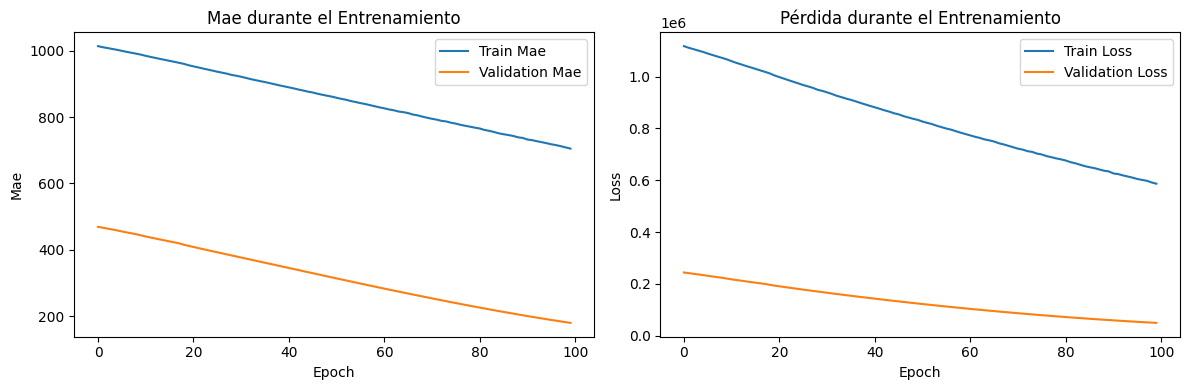

Evaluación del modelo:
37/37 [==============================] - 0s 1ms/step - loss: 49808.4258 - mae: 179.5765


[49808.42578125, 179.5765380859375]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Epoch 1/120
293/293 [==============================] - 1s 1ms/step - loss: 1103596.5000 - mae: 1007.0753 - val_loss: 240345.0156 - val_mae: 467.7127
Epoch 2/120
293/293 [==============================] - 0s 840us/step - loss: 1073992.3750 - mae: 991.9772 - val_loss: 235208.2656 - val_mae: 463.3859
Epoch 3/120
293/293 [==============================] - 0s 862us/step - loss: 1053554.1250 - mae: 981.6982 - val_loss: 231133.6406 - val_mae: 459.9667
Epoch 4/120
293/293 [==============================] - 0s 847us/step - loss: 1034754.7500 - mae: 972.0779 - val_loss: 227443.8594 - val_mae: 456.7479
Epoch 5/120
293/293 [==============================] - 0s 882us/step - loss: 1015920.3750 - mae: 962.4511 - val_loss: 224000.1094 - val_mae: 453.5914
Epoch 6/120
293/293 [==============================] - 0s 854us/step - loss: 997701.2500 - mae: 953.0648 - val_loss: 220753.8125 - val_mae: 450.4490
Epoch 7/120
293/293 [==============================] - 0s 847us/step - loss: 980352.0625 - mae: 943.94

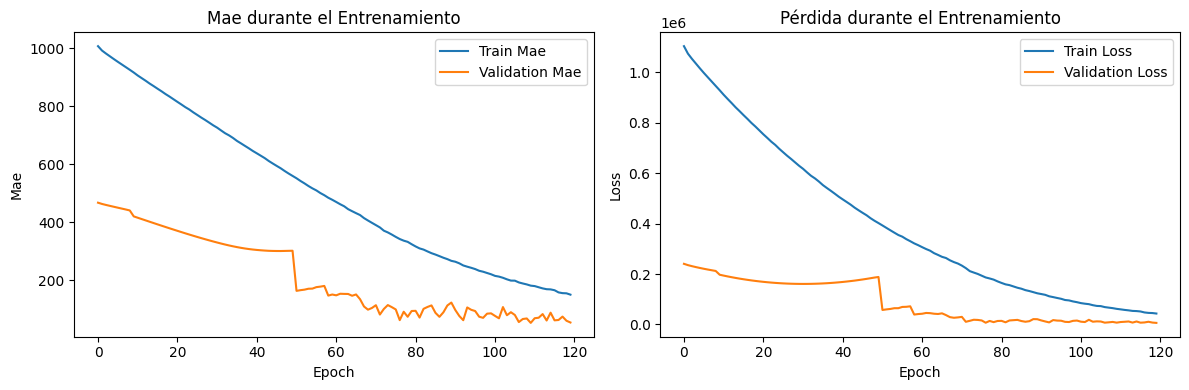

Evaluación del modelo:
37/37 [==============================] - 0s 612us/step - loss: 6126.4644 - mae: 54.8510


[6126.46435546875, 54.851009368896484]

In [99]:
# Crear una instancia de la red neuronal personalizada
nn = CustomNeuralNetwork(input_shape=(X_train.shape[1],), hidden_layers=3, units_per_layer=32, 
                         activation='tanh', dropout_rate=0.2, l2_lambda=0.01, learning_rate=0.01)

# Compilar el modelo
nn.compile_model(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo con TensorBoard
nn.train_model(X_train, y_train, validation_data=(X_test, y_test), epochs=120, batch_size=16, plot_training=True)

# Evaluar el modelo
print("Evaluación del modelo:")
nn.evaluate_model(X_test, y_test)

## Timesteps

In [103]:
import numpy as np

def create_sequences(data, target_column, timesteps):
    """
    data: DataFrame con todas las variables (features + target).
    target_column: Nombre de la columna objetivo ('CASE_COUNT').
    timesteps: Número de pasos de tiempo (ventana de historial).
    """
    sequences = []
    targets = []
    
    for i in range(len(data) - timesteps):
        # Extraer una secuencia de `timesteps` días como entrada
        sequence = data.iloc[i:i+timesteps].drop(columns=[target_column]).values
        # El objetivo es el valor del día siguiente
        target = data.iloc[i+timesteps][target_column]
        sequences.append(sequence)
        targets.append(target)
    
    return np.array(sequences), np.array(targets)

# Usando la función
timesteps = 1168 
X, y = create_sequences(df_final, target_column='CASE_COUNT', timesteps=timesteps)


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

Epoch 1/80
234/234 [==============================] - 3s 10ms/step - loss: 1027491.5000 - mae: 965.9103 - val_loss: 203865.0469 - val_mae: 429.2353
Epoch 2/80
234/234 [==============================] - 2s 9ms/step - loss: 1016062.0000 - mae: 959.9678 - val_loss: 200019.3125 - val_mae: 424.7323
Epoch 3/80
234/234 [==============================] - 2s 9ms/step - loss: 1007779.0000 - mae: 955.6477 - val_loss: 196480.3750 - val_mae: 420.5450
Epoch 4/80
234/234 [==============================] - 2s 9ms/step - loss: 999884.6875 - mae: 951.5049 - val_loss: 193063.4688 - val_mae: 416.4626
Epoch 5/80
234/234 [==============================] - 2s 9ms/step - loss: 992183.5625 - mae: 947.4434 - val_loss: 189721.2500 - val_mae: 412.4305
Epoch 6/80
234/234 [==============================] - 2s 9ms/step - loss: 984603.0000 - mae: 943.4338 - val_loss: 186434.9531 - val_mae: 408.4270
Epoch 7/80
234/234 [==============================] - 2s 9ms/step - loss: 977102.8750 - mae: 939.4489 - val_loss: 183212

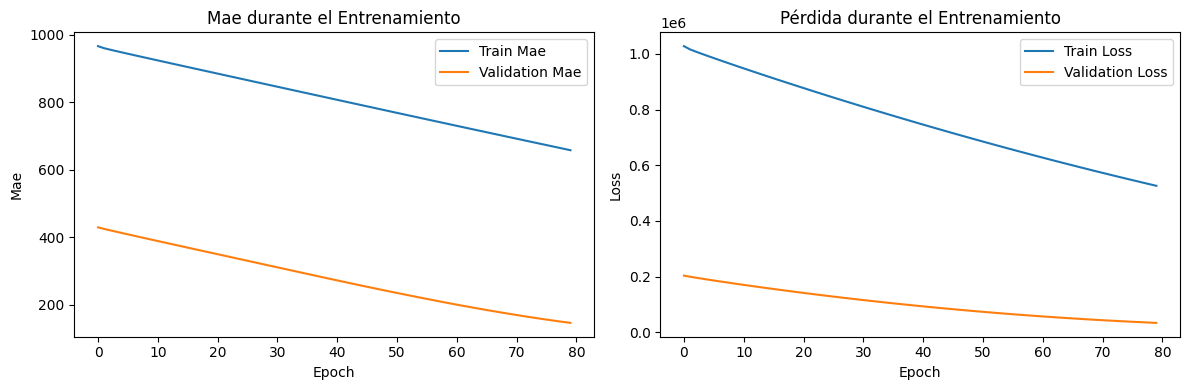

Evaluación del modelo:
30/30 [==============================] - 0s 7ms/step - loss: 34294.6680 - mae: 146.2368


[34294.66796875, 146.23678588867188]

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

nn = CustomNeuralNetwork(input_shape=(timesteps, X.shape[2]), hidden_layers=2, units_per_layer=16, 
                         activation='tanh', dropout_rate=0.2, l2_lambda=0.01, learning_rate=0.001)

# Compilar el modelo
nn.compile_model(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo con TensorBoard
nn.train_model(X_train, y_train, validation_data=(X_test, y_test), epochs=80, batch_size=16, plot_training=True)

# Evaluar el modelo
print("Evaluación del modelo:")
nn.evaluate_model(X_test, y_test)

# LLEVA SU TIEMPO